In [1]:
import os
import pandas as pd
import numpy as np
import spacy
import string


### LOADING DATA
food_df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()),'data', 'data.csv'))
print(food_df.sample(5))

2023-07-18 22:05:46.593148: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-18 22:05:46.596889: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-18 22:05:46.680854: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-18 22:05:46.682238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 22:05:48.079207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

       Unnamed: 0                                              texts  \
7262         7262  Hi assistant, I need to order a take out for o...   
12781       12781  You would like Coke for two people, is that co...   
7797         7797               I'd like to order some takeout food.   
9032         9032  I'd like a double cheese burger with lettuce, ...   
10828       10828                          I wanted to order a gyro.   

                                                   foods  \
7262                          ['take out', 'one person']   
12781                             ['Coke', 'two people']   
7797                                         ['takeout']   
9032   ['a double cheese burger with lettuce, tomato,...   
10828                                           ['gyro']   

                                             annotations  labels  
7262   ['food_order.type.retrieval', 'food_order.num....       1  
12781  ['food_order.name.item', 'food_order.num.people']       1  
7797 

In [2]:
### VEKTORIZACIJA TOKENA:
from nlp_functions import spacy_parser
predtrenirani_vektori = spacy.load("en_core_web_lg")

tokens = []
vectors = []
for idx,row in food_df.iterrows():
    t,v = spacy_parser(predtrenirani_vektori, row['texts'])
    tokens.append(t)
    vectors.append(v)

food_df['tokens'] = tokens

In [3]:
food_df.sample(3)

Unnamed: 0                                              texts  \
5804        5804  Just to confirm, you would like to order 3 san...   
6284        6284                             No, that would be all.   
1273        1273  Yeah! And can you make sure there's plenty of ...   

                                  foods  \
5804                   ['3 sandwiches']   
6284                                 []   
1273  ['three large cokes', 'crackers']   

                                           annotations  labels  \
5804                          ['food_order.name.item']       1   
6284                                                []       0   
1273  ['food_order.name.item', 'food_order.name.item']       1   

                                                 tokens  
5804  [Just, to, confirm, ,, you, would, like, to, o...  
6284                   [No, ,, that, would, be, all, .]  
1273  [Yeah, !, And, can, you, make, sure, there, 's...

In [4]:
### kodiranje labela - po tokenu
from preprocessing import encode_labels_from_tokens

labels = encode_labels_from_tokens(food_df)
# print(labels)

In [5]:
labels[5:10]


[[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]]

In [6]:
### TESTING THE TOKENS AND LABELS (lengths)
i = 56
print(tokens[i])
# print(vectors[56])
print(labels[i])


assert len(tokens[i]) == len(labels[i])

['Hi', ',', 'I', "'m", 'in', 'this', 'really', 'like', 'super', 'three', '-', 'way', 'relationship', ',', 'and', 'we', 'are', 'looking', 'to', 'buy', 'some', 'sandwiches', '.', 'Can', 'you', 'help', 'me', 'with', 'that', '?']
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [7]:
import random
for x in range(10):
    i = random.randint(0,len(tokens)-1)
    assert len(tokens[i]) == len(labels[i])

# quit()

### provjera shapeova u napravljenim listama
for i,text in enumerate(vectors):
    assert len(vectors[i]) == len(labels[i]) == len(tokens[i])

In [8]:
vectors[0][0].shape

(300,)

In [9]:
food_df['TokenCount'] = food_df['tokens'].str.len()

food_df['TokenCount']

0         2
1         6
2         9
3        12
4        10
         ..
13948     5
13949     6
13950    23
13951     5
13952     2
Name: TokenCount, Length: 13953, dtype: int64

In [14]:
print(food_df['TokenCount'][16])
print(food_df['tokens'][16])

13
['No', ',', 'I', 'think', 'that', "'ll", 'do', 'it', 'for', 'me', '.', 'Thanks', '.']


In [10]:
food_df['TokenCount'].describe()

count    13953.000000
mean        10.551709
std          8.429283
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max        116.000000
Name: TokenCount, dtype: float64

In [11]:
food_df['TokenCount'].value_counts()

TokenCount
2      1551
6      1361
8      1056
5      1021
3       991
       ... 
84        1
60        1
49        1
61        1
102       1
Name: count, Length: 70, dtype: int64

<Axes: >

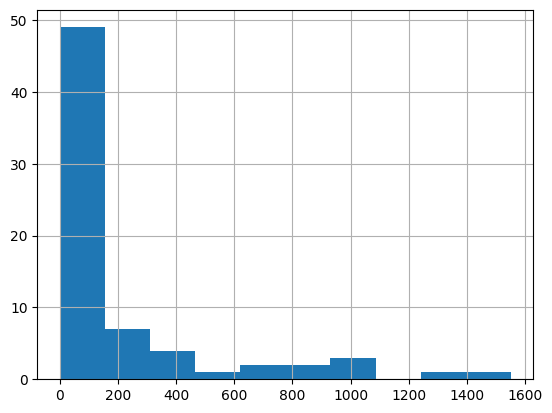

In [12]:
food_df['TokenCount'].value_counts().hist()